# Project 01 - Color Compression

## Thông tin sinh viên

- Họ và tên: Nguyễn Văn Lê Bá Thành
- MSSV: 22127390
- Lớp: 22CLC08

## Import các thư viện liên quan

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

## Helper functions

In [12]:
def read_img(img_path):
    '''
    Read image from img_path

    Parameters
    ----------
    img_path : str
        Path of image

    Returns
    -------
        Image (2D)
    '''

    # YOUR CODE HERE
    raw_image = Image.open(img_path).convert("RGB") 
    return raw_image

def show_img(img_2d):
    '''
    Show image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    '''

    # YOUR CODE HERE
    plt.imshow(img_2d)

def save_img(img_2d, img_path):
    '''
    Save image to img_path

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)
    img_path : str
        Path of image
    '''

    # YOUR CODE HERE
    img_2d.save(img_path)

def convert_img_to_1d(img_2d):
    '''
    Convert 2D image to 1D image

    Parameters
    ----------
    img_2d : <your type>
        Image (2D)

    Returns
    -------
        Image (1D)
    '''

    # YOUR CODE HERE
    height, width = img_2d.size
    flatten = np.reshape(img_2d, (width * height, 3)).astype(int)
    return flatten


def kmeans(img_1d, k_clusters, max_iter, init_centroids):
    '''
    K-Means algorithm

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    k_clusters : int
        Number of clusters
    max_iter : int
        Max iterator
    init_centroids : str, default='random'
        The method used to initialize the centroids for K-means clustering
        'random' --> Centroids are initialized with random values between 0 and 255 for each channel
        'in_pixels' --> A random pixel from the original image is selected as a centroid for each cluster

    Returns
    -------
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Stores the color centroids for each cluster
    labels : np.ndarray with shape=(height * width, )
        Stores the cluster label for each pixel in the image
    '''
    
    # YOUR CODE HERE
    centroids = init_centroid_value(img_1d, k_clusters, init_centroids)

    for _ in range(max_iter):
        # save old centroids
        centroids_old = np.copy(centroids)

        # distance between each pixel and centroids
        distance = np.linalg.norm(img_1d - centroids[:, np.newaxis], axis=2)
        # Find the label of each pixel
        labels = np.argmin(distance, axis = 0)
        
        for i in range(k_clusters):
            if(len(img_1d[labels == i])):
                centroids[i] = np.mean(img_1d[labels == i], axis=0)
            else:
                temp = np.zeros(img_1d.shape[1])
                centroids[i] = temp

        if (np.array_equal(centroids, centroids_old) == True):
            print("There are no difference between new created centroids and old centroids. Breaking the loop")
            break
        
    return centroids, labels

    
def generate_2d_img(img_2d_shape, centroids, labels):
    '''
    Generate a 2D image based on K-means cluster centroids

    Parameters
    ----------
    img_2d_shape : tuple (height, width, 3)
        Shape of image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    labels : np.ndarray with shape=(height * width, )
        Store label for pixels (cluster's index on which the pixel belongs)

    Returns
    -------
        New image (2D)
    '''
    # YOUR CODE HERE
    result = centroids[labels].reshape(img_2d_shape[0], img_2d_shape[1], 3)
    result = Image.fromarray(np.uint8(result))
    return result


# Your additional functions here
def init_centroid_value(img_1d, k_clusters, init_centroids):
    '''
    Generate centroids with init_centroids type

    Parameters
    ----------
    img_1d : np.ndarray with shape=(height * width, num_channels)
        Original (1D) image
    centroids : np.ndarray with shape=(k_clusters, num_channels)
        Store color centroids
    Init_centroids : string
        Store init_centroids type (random or in_pixels)

    Returns
    -------
        New image (2D)
    '''
    # Create array with unique value
    new = np.unique(img_1d, axis=0)
    length, dim = new.shape

    if init_centroids == 'random':
        centroids = np.random.randint(256, size = (k_clusters, dim))
    elif init_centroids == 'in_pixels':
        centroids = img_1d[np.random.choice(length, size = (k_clusters))]
    return centroids

## Your tests

In [13]:
# from time import time
# import os

# def get_Image_Size(img_path):
#     file_size = os.stat(img_path)
#     return file_size.st_size / 1024

# def test():
# # Input của chương trình
#     img_path = input('Enter image\'s path: ')
#     max_iter = int(input("Enter max iteration: "))
#     centroidsT = int(input("Initial centroid: \n0) random \n1) in_pixels \nYour choice: "))
#     data_type = int(input('Enter data type you want to save: \n0) png \n1) pdf \n2) jpg'))

#     # File name add-on
#     if data_type == 0:
#         fmat = 'png'
#     elif data_type == 1:
#         fmat = 'pdf'
#     elif data_type == 2:
#         fmat = 'jpg'
#     else:
#         print('Invalid data_type')
#         return

#     # Init centroids types
#     if centroidsT == 0:
#         centroids_type = 'random'
#     elif centroidsT == 1:
#         centroids_type = 'in_pixels'
#     else:
#         print('Invalid centroid initialization method')
#         return

#     # Parse file's path
#     img_name_idx = img_path.rfind('.')                          # Get ending index of image's name
#     img_name = img_path[0:img_name_idx].split("\\")[-1]         # Get img_name
#     result_path = img_path[0:img_name_idx-len(img_name)]        # Get the path to folder that contain the image 

#     # Read the image
#     raw_img = read_img(img_path)

#     # Convert read image into ndarray
#     pix = np.array(raw_img)

#     # Get shape of the image
#     raw_img_shape = pix.shape

#     # Convert read image into a 1 dimension array
#     flatten = convert_img_to_1d(raw_img)
    
#     # Print image's size
#     raw_img_size = get_Image_Size(img_path)
#     print(f"Original image's size: {raw_img_size:0.3f} KB")

#     # Print the orignal image
#     show_img(raw_img)
#     plt.title(f"Hình ảnh gốc")
#     plt.axis("off")
#     plt.figtext(0.5, 0.17, f"Dung lượng: {raw_img_size:0.3f} KB", horizontalalignment='center', va='top', color='black', fontsize=12)
#     plt.show()

#     # Test K-means algorithm on 4 given clusters
#     k_cluster = [3, 5, 7]
#     for k in k_cluster:
#         print(f"Perform K-means clustering with {k} colors")
#         print("-------------------------------------------")
#         result_path = ""
#         new_img_size = 0
#         t0 = time()
#         centroids, labels = kmeans(flatten, k, max_iter, centroids_type)
#         new_img = generate_2d_img(raw_img_shape, centroids, labels)
#         new_img = Image.fromarray(np.uint8(new_img))
#         result_path = result_path + img_name + "_" + str(k) + "_compressed." + fmat
#         save_img(new_img, result_path)
#         print(result_path)
#         new_img_size = get_Image_Size(result_path)
#         show_img(new_img)
#         plt.title(f"Ảnh được nén với ({k} màu, {centroids_type})")
#         plt.axis("off")
#         plt.figtext(0.5, 0.17, f'Thời gian chạy {time() - t0:0.3f}s.', ha='center', va='top', color='black', fontsize=12)
#         plt.figtext(0.5, 0.12, f"Dung lượng: {new_img_size:0.3f} KB", ha='center', va='top', color='black', fontsize=12)
#         plt.figtext(0.5, 0.07, f"Giảm {100-(new_img_size/raw_img_size*100):0.3f}% dung lượng", ha='center', va='top', color='black', fontsize=12)
#         plt.show()
#         print("-------------------------------------------")
        


## Main FUNCTION

In [14]:
# YOUR CODE HERE
def main():
    img_path = input('Enter image\'s path: ')
    max_iter = int(input("Enter max iteration: "))
    k_cluster = int(input("Number of k cluster: "))
    centroidsT = int(input("Initial centroid: \n0) random \n1) in_pixels \nYour choice: "))
    data_type = int(input('Enter data type you want to save: \n0) png \n1) pdf \n2) jpg \nYour choice: '))

    # File name add-on
    if data_type == 0:
        fmat = 'png'
    elif data_type == 1:
        fmat = 'pdf'
    elif data_type == 2:
        fmat = 'jpg'
    else:
        print('Invalid data_type')
        return

    # Init centroids types
    if centroidsT == 0:
        centroids_type = 'random'
    elif centroidsT == 1:
        centroids_type = 'in_pixels'
    else:
        print('Invalid centroid initialization method')
        return
    
    # Parse file's path
    img_name_idx = img_path.rfind('.')                          # Get ending index of image's name
    img_name = img_path[0:img_name_idx].split("\\")[-1]         # Get img_name
    result_path = img_path[0:img_name_idx-len(img_name)]        # Get the path to folder that contain the image 

    # Read the image
    raw_img = read_img(img_path)

    # Convert read image into ndarray
    pic = np.array(raw_img)

    # Get shape of the image
    raw_img_shape = pic.shape

    # Convert read image into a 1 dimension array
    flatten = convert_img_to_1d(raw_img)

    # Get centroids and labels
    centroids, labels = kmeans(flatten, k_cluster, max_iter, centroids_type)

    # Generate a 2d array with centroids and labels
    output = generate_2d_img(raw_img_shape, centroids, labels)
    
    # Construct image's name and its path
    print(f"Compressed file save at {result_path} as {fmat}") 
    result_path = result_path + img_name + "_" + str(k_cluster) + "_compressed." + fmat
    
    # Save the image with previously construct path
    save_img(output, result_path)   

    # Print the image on screen
    show_img(output)
    plt.title(f"Ảnh được nén với ({k_cluster} màu, {centroids_type})")
    plt.axis("off")
    plt.show()

    
    

There are no difference between new created centroids and old centroids. Breaking the loop
Compressed file save at C:\Users\admin\Downloads\ as pdf


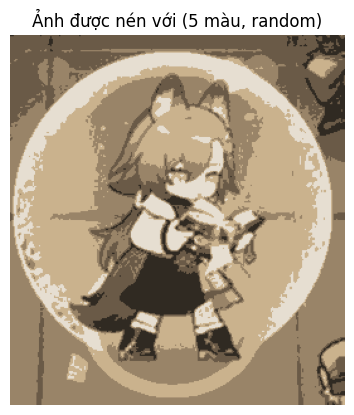

In [15]:
# Call main function
main()